# 19기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
![image.png](attachment:image.png)

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 9.4 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

In [3]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

## 데이터 불러오기

In [15]:
df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

df = df[["Close"]]

df = df.reset_index()

df.columns = ['day', 'price']

df['day'] = pd.to_datetime(df['day'])

df.index = df['day']
df.set_index('day', inplace=True)

df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


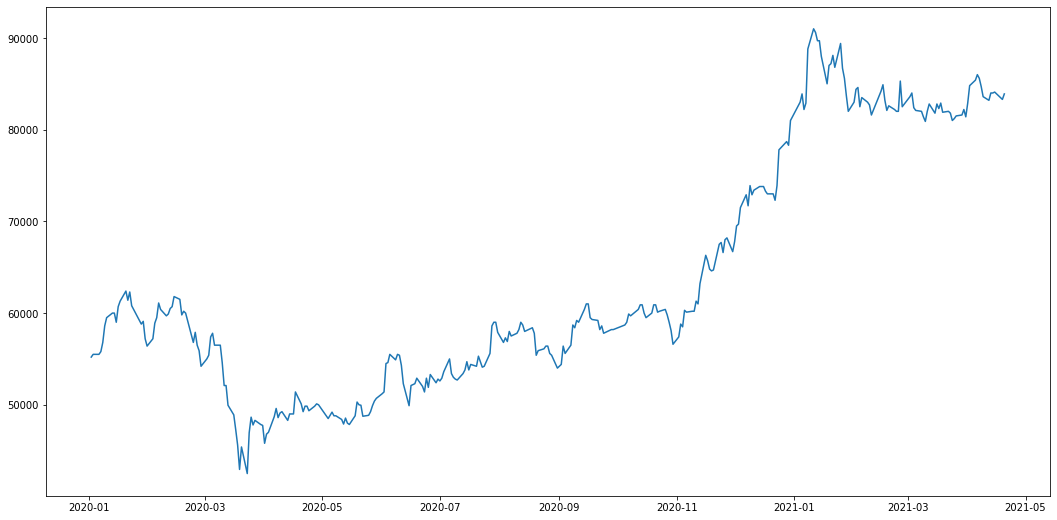

In [16]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["price"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Price')
plt.show()

In [17]:
df.sort_index(inplace=True)

In [19]:
df_pr = df.copy()
df_pr = df.reset_index()

In [33]:
df_pr.columns = ['ds','y'] 

In [34]:
train_data_pr = df_pr.iloc[:len(df)-7]
test_data_pr = df_pr.iloc[len(df)-7:]

In [31]:
train_data_pr.shape, test_data_pr.shape

((315, 2), (7, 2))

In [27]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 1.8 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [28]:
from prophet import Prophet

In [46]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=7,freq='D')
prophet_pred = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xkpw1n4/d8aa_aze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xkpw1n4/6oqm3ryo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19685', 'data', 'file=/tmp/tmp7xkpw1n4/d8aa_aze.json', 'init=/tmp/tmp7xkpw1n4/6oqm3ryo.json', 'output', 'file=/tmp/tmp7xkpw1n4/prophet_modelomq7quz0/prophet_model-20230314105045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


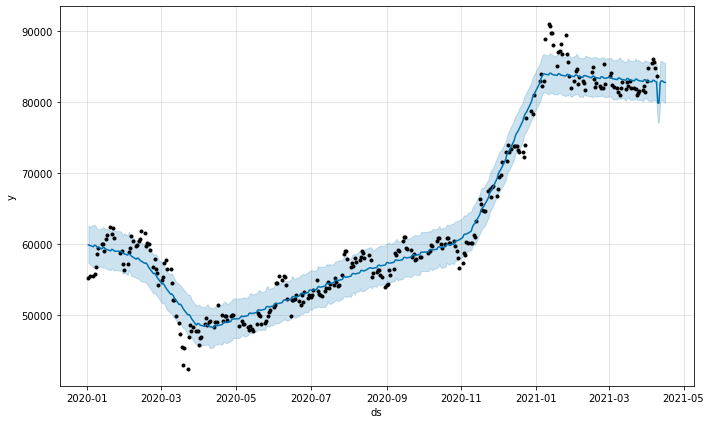

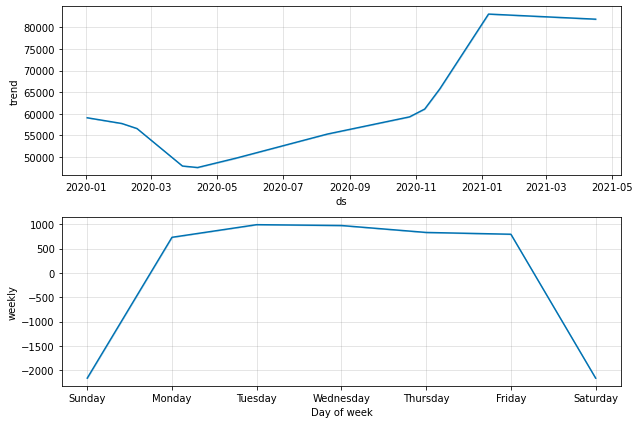

In [47]:
fig1 = m.plot(prophet_pred)
fig2 = m.plot_components(prophet_pred)

In [48]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7:]['ds'], "Pred" : prophet_pred[-7:]["yhat"]})

In [49]:
prophet_pred = prophet_pred.set_index("Date")

In [50]:
prophet_pred.index.freq='D'

In [51]:
prophet_pred

,Pred
Date,
2021-04-10,79836.867684
2021-04-11,79824.900745
2021-04-12,82709.571442
2021-04-13,82957.309691
2021-04-14,82927.919060
2021-04-15,82773.405691
2021-04-16,82724.694480


In [53]:
test_data_pr["Prophet_Predictions"] = prophet_pred['Pred'].values

<ipython-input-53-ab046060f9a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_pr["Prophet_Predictions"] = prophet_pred['Pred'].values


In [54]:
import seaborn as sns

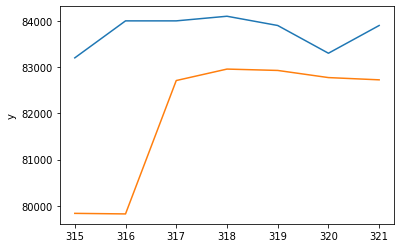

In [56]:
plt.figureafigsize=(16,5)
ax = sns.lineplot(x= test_data_pr.index, y=test_data_pr["y"])
sns.lineplot(x=test_data_pr.index, y = test_data_pr["Prophet_Predictions"]);

In [58]:
from statsmodels.tools.eval_measures import rmse
prophet_rmse_error = rmse(test_data_pr["y"], test_data_pr["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['price'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 4902377.964191312
RMSE Error: 2214.131424326775
Mean: 63323.60248447205


In [59]:
rmse_errors = [prophet_rmse_error]
mse_errors = [prophet_mse_error]
errors = pd.DataFrame({"Models" : ["Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

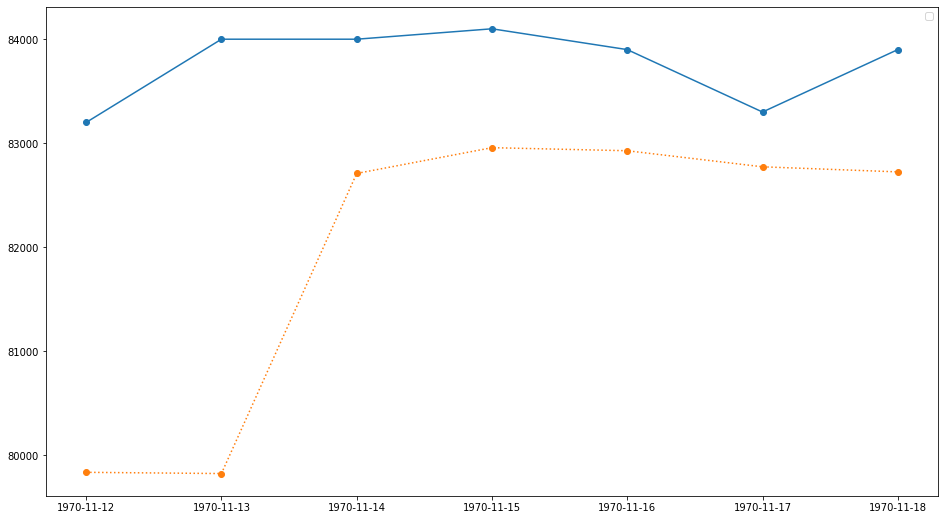

In [60]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data_pr.index, test_data_pr["y"], linestyle="-")
plt.plot_date(test_data_pr.index, test_data_pr["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [62]:
print(f"Mean: {test_data_pr['y'].mean()}")
errors

Mean: 83771.42857142857


,Models,RMSE Errors,MSE Errors
0,Prophet,2214.131424,4.902378e+06


In [63]:
test_data_pr

,ds,y,Prophet_Predictions
315,2021-04-12,83200.0,79836.867684
316,2021-04-13,84000.0,79824.900745
317,2021-04-14,84000.0,82709.571442
318,2021-04-15,84100.0,82957.309691
319,2021-04-16,83900.0,82927.919060
320,2021-04-19,83300.0,82773.405691
321,2021-04-20,83900.0,82724.694480
